# 10.02 Online Learning

There are different models that support online learning but the technique to change
the model parameters during the learning - the optimizer - is almost always
some variant on top of Gradient Descent (GD).
The GD is a technique which attempts to find
a minimal model error by walking through the function of model parameters.

Imagine the GD technique as attempting to find the lowest place in a mountain
range whilst blindfolded.
With your feet you can sense whether the slope is going downwards or upwards,
and you can walk downwards towards on the slope going down.
You will not want to take too big steps or jump forward,
first in order to not fall into a gorge but also in order to not miss
a piece of slope going downwards into another direction.
In such an endeavor one would perform very small steps,
in the GD technique the small steps are the *learning rate*,
which is a small number to multiply the steps with.

![Spruce-Fir Forest Cover](ol-forest-spruce-fir.svg)

<div style="text-align:right;"><sup>ol-forest-spruce-fir.svg</sup></div>

We are not considering obstacles in the mountains, such as trees or rocks.
Hence we will draw those instead of involving them in our GD analogy.
Let's import the three dimensional plotting engine so we can visualize an example of GD.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d  # noqa

## Gradient Descent

Imagine a model with two parameters (e.g. a regularized linear regression in two dimensions),
for each combination of parameters we have some model error
(misclassification or distance to regression line).
The shape of such an **error function** is determined by the data to which we are fitting the model.
To train a model means to find parameters for which the value of the error is low.
Until now we just argue that an optimizer performs this task.
Behind the scenes we have already used a variant of GD as an optimizer
to train several models.

In GD we initialize the parameters at random and calculate
the gradient over this model error function.
We will call this error function $E$ and the gradient for it then is.

$$
\nabla E = \frac{\partial E}{\partial w_1}\hat{\imath} + \frac{\partial E}{\partial w_2}\hat{\jmath} + \ldots
$$

i.e. it is the partial derivative against each function parameter, in two dimensions
it is against two parameters only ($\hat{\imath}$ and $\hat{\jmath}$ are *versors*,
they just say that the value exist only in a specific dimension -
it saves space of writing a vector with zeros everywhere but one dimension).

In more advanced variants of GD there are heuristics as to what values
to start from but for our purposes.
For example random values in the same magnitude of the mean and variance of the data.

![Lodgepole Pine Forest Cover](ol-forest-lodgepole-pine.svg)

<div style="text-align:right;"><sup>ol-forest-lodgepole-pine.svg</sup></div>

The gradient tells us how a function varies around the current model parameters,
its direction tells us in which direction lie worse (higher model error) parameters.
It also means that in the *opposite direction* lie better (lower error) parameters.
Yet, he gradient does not tell us *how far away these parameters lie*.
The *learning rate* in online learning is the distance that we will move in the direction
of lower model error.
One can use the learning rate as the distance or as a scale of the distance
given by the magnitude (length) of the gradient in a direction.
Hence **we move this distance in the direction given by the opposite of the gradient direction**.
This is one iteration of the algorithm.
And after we move to those parameters we will look at the gradient
again and repeat the procedure, until convergence (or maximum iterations) is reached.

Let's try to visualize such an error function and a GD algorithm.
We will take a rather over-complex two dimensional function to be our model
but in two dimensions we can at least visualize it.

$$
f(w_1, w_2) = 10 - 2 \sin(w_1) - \cos(w_2) - \cos\left( 2 w_2 - \frac{\pi}{10} \right) - \frac{w_1}{2}
$$

Here $f$ is the error function of a model with two weights (parameters) $w_1$ and $w_2$.
The trigonometric functions ($\sin$, $\cos$) we will consider as the algorithm,
and the values ($10$, $-2$, $-1$, $-1$, $2$, $\frac{-\pi}{10}$, $\frac{-1}{2}$)
we will consider as our data.
We are only in two dimensions - corresponding to versors $\hat{i}$, $\hat{j}$ - hence
we take the gradients as the two partial derivatives, one against each weight.

$$
\frac{\partial f}{\partial w_1} = - 2 \cos(x) - \frac{1}{2}
$$
$$
\frac{\partial f}{\partial w_2} = \sin(w_2) + 2 \sin\left( 2 w_2 - \frac{pi}{10} \right)
$$

Note how the values that we considered to be our data are still present in the partial derivatives.
The error function shape is dependent on the data we train the algorithm with,
so it should not be a surprise that the direction of the steps we take should,
as well, be dependent on the data.

We have everything to build an optimizer for this error function and in the
process train our fictitious model.
We start with random values for the weights: $w_1 = 5.5$ and $w_2 = 5.5$.
These values have been chosen because they produce a good visualization,
feel free to change them and see that the algorithm works for any values.
Also we take a learning rate as $0.1$.
The algorithm simply finds the gradient at the current point and steps
the length of the gradient in the opposite direction scaled by the learning rate.
Then repeat until convergence.

Below we repeat the step of the algorithm $10$ times,
in *for loop* to prove that there is no magic behind such an optimizer.

5.50 5.50 -> 5.69 5.76 E: 8.03 (reduction 1.07)
5.69 5.76 -> 5.91 6.01 E: 7.41 (reduction 1.02)
5.91 6.01 -> 6.14 6.19 E: 6.32 (reduction 0.83)
6.14 6.19 -> 6.39 6.29 E: 5.37 (reduction 0.71)
6.39 6.29 -> 6.64 6.35 E: 4.59 (reduction 0.63)
6.64 6.35 -> 6.88 6.38 E: 3.87 (reduction 0.55)
6.88 6.38 -> 7.09 6.39 E: 3.25 (reduction 0.44)
7.09 6.39 -> 7.28 6.40 E: 2.79 (reduction 0.33)
7.28 6.40 -> 7.44 6.41 E: 2.49 (reduction 0.23)
7.44 6.41 -> 7.57 6.41 E: 2.31 (reduction 0.15)


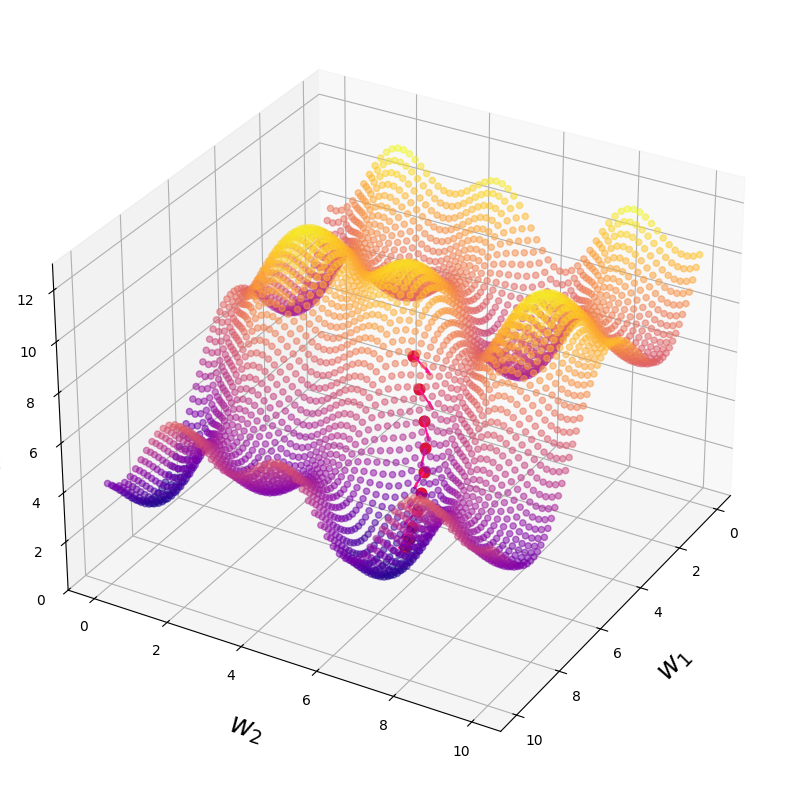

In [2]:
w1 = np.linspace(0, 10, 64)
w2 = np.linspace(0, 10, 64)
w1, w2 = np.meshgrid(w1, w2)
f = lambda x, y: 10 - 2*np.sin(x) - np.cos(y) - np.cos(2*y - np.pi/10) - 0.5*x  # noqa
dw1 = lambda x, y: - 2*np.cos(x) - 0.5  # noqa
dw2 = lambda x, y: np.sin(y) + 2*np.sin(2*y - np.pi/10)  # noqa
err = f(w1, w2)

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(w1, w2, err, c=err, cmap='plasma', alpha=.5)
ax.set_zlim(0, 13)
ax.set_zlabel('Model Error', fontsize=20, labelpad=10)
ax.set_xlabel('$w_1$', fontsize=20, labelpad=15)
ax.set_ylabel('$w_2$', fontsize=20, labelpad=15)

lr = 0.1
pw1, pw2 = 5.5, 5.5
arrow_scale = 3
for i in range(10):
    perr, pdw1, pdw2 = f(pw1, pw2), pw1 - dw1(pw1, pw2)*lr, pw2 - dw2(pw1, pw2)*lr
    pdz = perr - f(pdw1, pdw2)
    print('{:.2f} {:.2f} -> {:.2f} {:.2f} E: {:.2f} (reduction {:.2f})'.format(
        pw1, pw2, pdw1, pdw2, f(pdw1, pdz), pdz))
    ax.scatter(pw1, pw2, perr, color='crimson', s=60)
    ax.quiver(pw1, pw2, perr, arrow_scale*(pdw1-pw1), arrow_scale*(pdw2-pw2), 0, color='deeppink')
    pw1, pw2 = pdw1, pdw2

ax.view_init(elev=30., azim=30);

The algorithm will converge towards the valley (a minimum of the error function)
towards which the steepest descent was found along the way.
Another name for this algorithm is indeed **steepest descent**.
And also another name for the error function is the **cost function**.

In the example we find a rather good solution in a valley with low minima.
The final values for $w_1$ and $w_2$ can be read from the output.
Depending on the selection of the initial point a different solution will be found
since the algorithm, once it started descending into a valley it never leaves it.
A small valley in a high place may leave the algorithm stuck.

In this example we would be able to check for a stuck algorithm
But in a real problem the surface will be a high dimensional hyperplane,
since most machine learning models work in very high dimensions.
Many tricks exist to try to prevent the algorithm from getting stuck in such
a high valley in high dimensions: keep the value of previous gradients
as *momentum* of the movement, adapt the learning rate based on changes
in previous gradients magnitude, or sample the data used to construct
the function at every iteration, among many, many others.

Perhaps the most common technique to prevent getting stuck is to
reduce the learning rate at each iteration and combine it with
data sampling for the function.
In other words instead of using all the data to construct the error function
we randomly sample the data and perform an iteration with only a subsample.
This produces a slightly different (but still very similar) error function at each iteration.
The difference between functions are likely to smooth shallow valleys
but leave the deep valleys rather untouched,
hence the algorithm is likely to end at the bottom of a deep valley
making for a low error in the model.
We cal this technique *Stochastic Gradient Descent* (SGD).

Whilst SGD only uses a subsample of the data,
the decreasing learning rate allows for convergence despite the fact
the error function keep changing.
In `sklearn`'s implementation of SGD  he default learning rate starts at $1/\alpha$,
where $\alpha$ is the constant multiplying an `L2` regularization term
and defaults to a small value ($0.0001$ at the time of writing).

### Do not Confuse the Functions

Remember that the error/cost function we try to optimize is a completely
different function from the model itself.
GD and SGD are optimizers that can be used to optimize any function,
in the case here we use them to optimize an error/cost function
which is a combination of model function and data - including labels.

For example the `Ridge` regression added an extra term to the function we tried to optimize,
and that extra term allowed us for a better fit.
The gradient descent optimizes the cost function but the model itself
predicts values based on the actual fitted function (from the model parameters only).
In other words, we have the function (e.g. classification) we are trying to optimize,
and to find that we build and optimize a cost function,
which is a completely different function.

## Gradient Vector Directions

In summary, each parameter in the model is a dimension of the error/cost function,
and the component of the gradient vector in that same dimension is an indicator of how
the error changes if we change this specific parameter/weight.
In other words the ratio of change (derivative) between error and parameter
tells us in which direction a specific parameter should be updated to reach a smaller error.
It is often written that instead of the gradient vector,
what is used are *directed derivatives* in the direction of every parameter/weight.
In reality there's no difference in anything but notation.

$$
\nabla E \times \vec{u} = \| \nabla E \|_2 \| u \|_2 \cos \theta
$$

One detail that was left hanging is that we said that the gradient points towards
higher values of the function and accepted that as given truth.
We should prove to ourselves that the gradient points towards higher values of a
function and hence walking in the opposite direction will get us to lower values.

![Gradient Direction](ol-gradient-direction.svg)

<div style="text-align:right;"><sup>ol-gradient-direction.svg</sup></div>

The derivative of sine ($\sin$) is the cosine ($\cos$) which we have drawn
on a single dimensional input and output on a vertical axis.
If we look at the sine function its gradient should always point toward higher values of it.
And the cosine *is* its gradient.
The direction in which the cosine point, in the same (horizontal) dimensions as the sine follows,
is the sign of the cosine value.

*Whenever the cosine is positive the gradient of sine points to the right,
and whenever the cosine is negative the gradient of the sine points to the left.
This is because the cosine is the gradient of the sine.*

We can see the sine increases from $0$ to $\frac{\pi}{2}$.
And cosine is positive in this region meaning that the gradient of sine
points to the right towards the highest value of sine at $\frac{\pi}{2}$.
From $\frac{\pi}{2}$ to $\frac{3\pi}{2}$ the sine decreases,
the cosine is negative, and hence the gradient points left,
back towards the value at $\frac{\pi}{2}$.
After $\frac{3\pi}{2}$ the sine increases and the gradient
points again towards the right.
This continues over and over.